In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

Let's do simple linear regression:

In [43]:
# Parameters
learning_rate = 0.01
training_epochs = 5000
display_step = 100

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [12]:
print(n_samples)

17


In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [40]:
# Mean squared error
#cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2 * n_samples)
#cost = tf.reduce_mean(tf.squared_difference(pred, Y))
cost = tf.losses.mean_squared_error(
                Y,
                pred)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.345275700 W= 0.16968708 b= 0.9160553
Epoch: 0200 cost= 0.344893515 W= 0.16916114 b= 0.92042166
Epoch: 0300 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0400 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0500 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0600 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0700 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0800 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0900 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1000 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1100 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1200 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1300 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1400 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1500 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1600 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1700 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 1800 cost= 0.344891310 

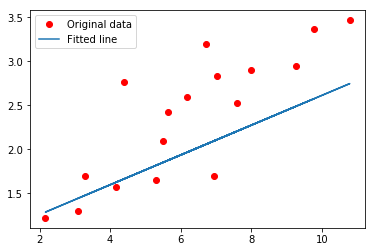

In [44]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# How does this compare to the closed form ols estimator?


In [23]:
from scipy import stats

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(train_X, train_Y)

In [25]:
slope

0.25163494428355404

In [26]:
intercept

0.7988012261753894